# Рекомендация тарифа клиенту мобильного оператора

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Импорт-и-знакомство-с-данными" data-toc-modified-id="Импорт-и-знакомство-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт и знакомство с данными</a></span></li><li><span><a href="#EDA-(мини)" data-toc-modified-id="EDA-(мини)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA (мини)</a></span></li><li><span><a href="#Разбиение-данных-на-выборки-и-инжиниринг-признаков" data-toc-modified-id="Разбиение-данных-на-выборки-и-инжиниринг-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Разбиение данных на выборки и инжиниринг признаков</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Baseline-модель" data-toc-modified-id="Baseline-модель-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline модель</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#К-ближайших-соседей" data-toc-modified-id="К-ближайших-соседей-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>К-ближайших соседей</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Наивный-Байес" data-toc-modified-id="Наивный-Байес-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Наивный Байес</a></span></li><li><span><a href="#Метод-опорных-векторов" data-toc-modified-id="Метод-опорных-векторов-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Метод опорных векторов</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Градиентный бустинг</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Кросс-валидация" data-toc-modified-id="Кросс-валидация-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Кросс-валидация</a></span></li><li><span><a href="#Стекинг" data-toc-modified-id="Стекинг-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Стекинг</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Введение

В нашем распоряжении данные о поведении клиентов, которые уже перешли на один из двух тарифов мобильного оператора. Нужно построить модель для задачи классификации, которая выберет подходящий тариф для клиентов оператора, использующих другие тарифы.

Необходимо построить модель с максимально большим значением *accuracy* (доля верных ответов). Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75.

## Импорт и знакомство с данными

Технический блок импортов и глобальных параметров.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
!{sys.executable} -m pip install -U seaborn --quiet --default-timeout=100 -i https://pypi.tuna.tsinghua.edu.cn/simple
!{sys.executable} -m pip install -U xgboost --quiet --default-timeout=100 -i https://pypi.tuna.tsinghua.edu.cn/simple
!{sys.executable} -m pip install -U sklearn --quiet --default-timeout=100 -i https://pypi.tuna.tsinghua.edu.cn/simple

import six
sys.modules['sklearn.externals.six'] = six
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection, tree, linear_model, metrics, ensemble, preprocessing, neighbors, naive_bayes, svm
import xgboost as xgb
import time

sns.set()
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_palette('pastel')
plt.rcParams["figure.figsize"] = (12, 8)

random_state = 2077
np.random.seed(seed=random_state)

Загрузка файла и ознакомление с содержимым.

In [2]:
filename = 'users_behavior.csv'
file_path = 'H:/Google_d/2021_ШАД/Yandex - project 6/'
try:
    df = pd.read_csv('/datasets/' + filename, sep=',')  # Серверный путь
    print('Загружено с сервера')
except:
    try:
        df = pd.read_csv(file_path + filename, sep=',')  # Локальный путь
        print('Загружено с локального диска')
    except:
        try:
            from google.colab import drive
            drive.mount('/content/drive')
            df = pd.read_csv('/content/drive/MyDrive/2021_ШАД/Yandex - project 6/' + filename, sep=',')  # Локальный путь
            print('Загружено с гугл-диска')
        except: 1;
display(df.head())
display(df.info())
display(df.describe(include='all'))

Загружено с сервера


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


- в данных нет пропусков и отрицательных значений, максимальные значение тоже адекватны
- есть небольшой дисбаланс классов - класс "ультра" составляет всего 30% от выборки

In [3]:
calls = 'calls'
minutes = 'minutes'
messages = 'messages'
mb_used = 'mb_used'
is_ultra = 'is_ultra'
features = 'features'
targets = 'targets'

## EDA (мини)

Проведем поверхностный анализ - просто чтобы понимать, что анализируем.

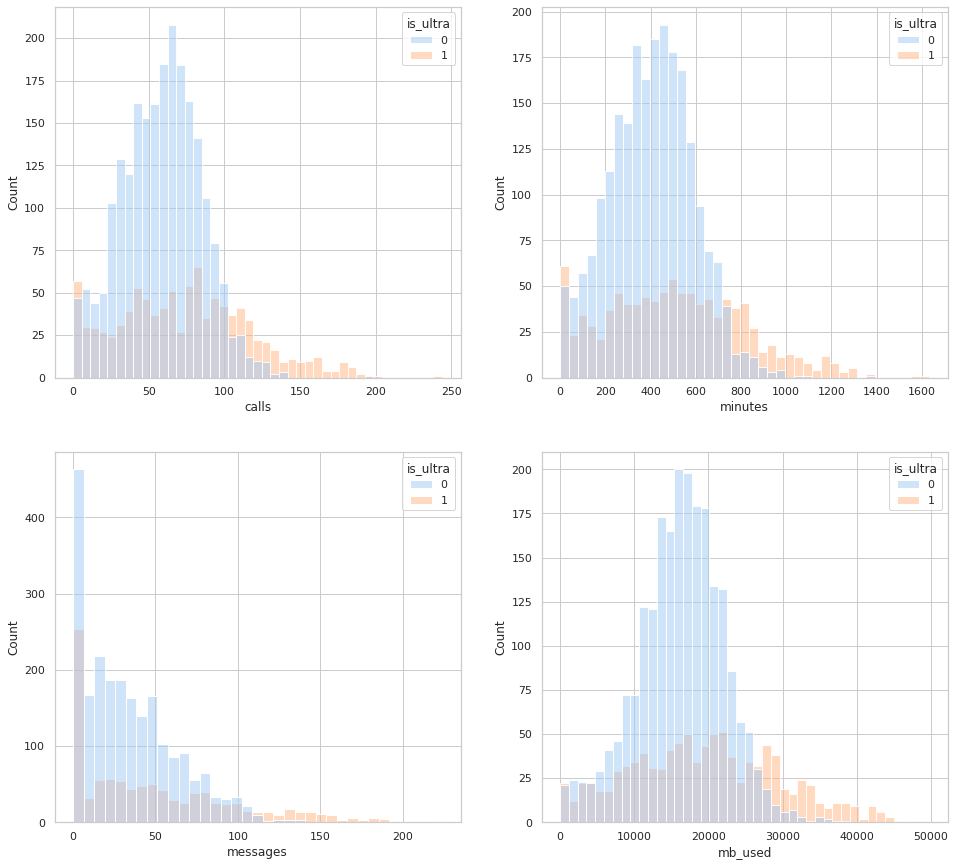

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(16,15))

sns.histplot(ax=ax[0,0], data=df, x=calls, hue=is_ultra)
sns.histplot(ax=ax[0,1], data=df, x=minutes, hue=is_ultra)
sns.histplot(ax=ax[1,0], data=df, x=messages, hue=is_ultra)
sns.histplot(ax=ax[1,1], data=df, x=mb_used, hue=is_ultra);

Радует, что все гистограммы для разных тарифов выглядят по-разному, то есть каждый признак небесполезен.
Лучше того - большинство распределений очень похожи на нормальные (правда, с избытком нулей). Впрочем, нас пока не учили тому, важна ли нормальность...

Посмотрим еще на корреляции этих признаков.

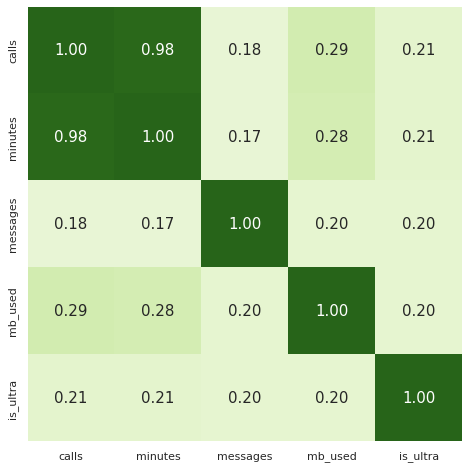

In [5]:
sns.heatmap(data=df.corr(),
            square=True, cmap="PiYG", 
            center=0,
            cbar=False,
            annot=True, fmt='.2f', annot_kws={'size': 15});

Тут сразу видно, что между количеством звонков и количеством минут есть сильная корреляция. Вероятно, лучше будет убрать один из этих признаков. Потом поэкспериментируем.

## Разбиение данных на выборки и инжиниринг признаков

Выделим 25% всех данных в качестве отложенной тестовой выборки. Так как наши объекты (строки) независимы и не связаны во времени, то будем случайно перемешивать их. Выборку сделаем стратифицированной. Посмотрим на размеры получившихся выборок.

Кроме того сразу сделаем новые признаки:
- все попарные произведения величин
- логарифмы величин
- категориальные признаки для нулевых значений каждого столбца

In [6]:
train_full = dict()
test = dict()
targets_df = df[is_ultra]
features_df = df[df.columns.drop(is_ultra)]

base_features_list = features_df.columns.tolist()
polynom_features_list = []
log_features_list = []
is_zero_features_list = []

for i in base_features_list:
    for j in base_features_list:
        features_df[i+'*'+j] = features_df[i] * features_df[j]
        polynom_features_list.append(i+'*'+j)
        
for i in base_features_list:
    features_df[i+'_log'] = np.log(features_df[i]+0.01)
    log_features_list.append(i+'_log')

for i in base_features_list:
    features_df[i+'_is_zero'] = (features_df[i] == 0).astype('int8')
    is_zero_features_list.append(i+'_is_zero')

train_full[features], test[features], train_full[targets], test[targets] = model_selection.train_test_split(
            features_df,
            targets_df, 
            test_size = 0.25, 
            random_state=random_state, 
            shuffle=True,
            stratify=targets_df
            )
for i in [train_full[features], test[features], train_full[targets], test[targets]]:
    display(i.shape)

(2410, 28)

(804, 28)

(2410,)

(804,)

Стандартизуем признаки, причем скейлер будем настраивать только по тренировочному набору (словно тестовый появится только в будущем, а в будущее мы не можем заглядывать).

In [7]:
quant_cols = train_full[features].drop(columns=is_zero_features_list).columns.tolist()
scaler = preprocessing.StandardScaler().fit(train_full[features][quant_cols])

quant_featured = pd.DataFrame(
    scaler.transform(train_full[features][quant_cols]), 
    columns=train_full[features][quant_cols].columns)

train_full[features] = pd.concat([
    quant_featured,
    train_full[features][is_zero_features_list].reset_index(drop=True),
    ], axis=1)

quant_featured = pd.DataFrame(
    scaler.transform(test[features][quant_cols]), 
    columns=test[features][quant_cols].columns)

test[features] = pd.concat([
    quant_featured,
    test[features][is_zero_features_list].reset_index(drop=True),
    ], axis=1)

Выборку test отложим на потом. Будем по ней проверять наши лучшие модели (как на каггле).

Теперь разобьем остаток на обучающую и валидационную выборки в той же пропорции.

In [8]:
train = dict()
valid = dict()

train[features], valid[features], train[targets], valid[targets] = model_selection.train_test_split(
            train_full[features],
            train_full[targets], 
            test_size = 0.25, 
            random_state=random_state, 
            shuffle=True,
            stratify=train_full[targets]
            )
for i in [train[features], valid[features], train[targets], valid[targets]]:
    display(i.shape)

(1807, 28)

(603, 28)

(1807,)

(603,)

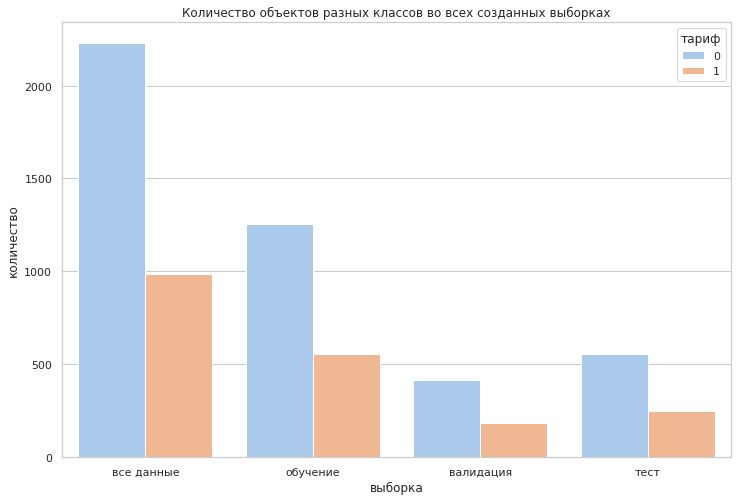

In [9]:
dat = pd.DataFrame()
for a, name in zip([targets_df, train[targets], valid[targets], test[targets]],
                   ['все данные', 'обучение', 'валидация', 'тест']):
    df = a.value_counts()
    df = pd.DataFrame(df)
    df['выборка'] = name
    dat = dat.append(df)
dat = dat.reset_index().rename(columns={'is_ultra': 'количество'})
dat['тариф'] = dat['index']
ax=sns.barplot(data=dat, x='выборка', y='количество', hue='тариф')
ax.set(title='Количество объектов разных классов во всех созданных выборках');

### Выводы

Сгенерировали новые признаки:
- полиномиальные (попарные произведения всех исходных признаков, включая квадраты)
- логарифмические (по одному на каждый из исходных признаков)
- категориальные, свидетельствующие о нулевых значениях исходных признаков

Стандартизировали новые признаки (кроме категориальных).

В исходных данных было 3214 объекта. Разбили их на:
- отложенную тестовую выборку - 804
- валидационную выборку - 603
- обучающую выборку - 1807

Все выборки стратифицированы.

## Исследование моделей

### Baseline модель

Для проверки адекватности модели рассмотрим две бейзлайн модели:
- выдача 1/0, исходя из доли этих классов в обучающей выборке
- выдача всегда 0, потому что 0 - наиболее популярный класс

In [10]:
p = train[targets].value_counts()[1] / train[targets].count()
l = len(valid[targets])
baseline_prediction = np.random.binomial(1, p, l)
baseline_acc1 = metrics.accuracy_score(valid[targets], baseline_prediction)
baseline_acc2 = metrics.accuracy_score(valid[targets], [0]*len(valid[targets]))
print(f'Точность случайного алгоритма: {baseline_acc1:.2%}')
print(f'Точность алгоритма, выдающего нули: {baseline_acc2:.2%}')

Точность случайного алгоритма: 56.38%
Точность алгоритма, выдающего нули: 69.32%


Далее будем считать, что все результаты ниже 69% неадекватны.

### Логистическая регрессия

Начнем с самого "прямолинейного". Используем только базовые признаки и не будем задавать гиперпараметры.

Т.к. запусков будет много, создадим универсальную функцию.

In [11]:
def run_fit(model, train, valid, features_list=False, verbose=False, plot=False):
    if not features_list:
        features_list = valid[features].columns.tolist()
    model.fit(train[features][features_list], train[targets])
    predictions = model.predict(valid[features][features_list])
    acc = metrics.accuracy_score(valid[targets], predictions)
    print(f'Доля верных ответов (обучение): {metrics.accuracy_score(train[targets], model.predict(train[features][features_list])):.2%}')
    print(f'Доля верных ответов (валидация): {acc:.2%}')
    model_name = str(type(model)).split('.')[-1]
    
    if 'LogisticRegression' in model_name:
        coef = pd.Series(index=train[features][features_list].columns, data=model_lin.coef_[0]).round(2)
        print(f'Количество ненулевых коэффициентов регрессии: {coef[coef != 0].count()} из {coef.count()}')
        if verbose:
            print('Коэффициенты линейной регрессии:')
            display(coef.sort_values(ascending=False))
        return(coef)

In [12]:
model_lin = linear_model.LogisticRegression(random_state=random_state, solver='saga')
run_fit(model_lin, train, valid, base_features_list, verbose=True);

Доля верных ответов (обучение): 74.76%
Доля верных ответов (валидация): 72.64%
Количество ненулевых коэффициентов регрессии: 4 из 4
Коэффициенты линейной регрессии:


messages    0.33
mb_used     0.31
minutes     0.26
calls       0.10
dtype: float64

Уже лучше, чем бэйзлайн.

Попробуем использовать все сгенерированные ранее признаки.

In [13]:
model_lin = linear_model.LogisticRegression(random_state=random_state, solver='saga')
run_fit(model_lin, train, valid, verbose=False);

Доля верных ответов (обучение): 80.24%
Доля верных ответов (валидация): 79.60%
Количество ненулевых коэффициентов регрессии: 28 из 28


Выиграли несколько процентов! Но при этом мы использовали огромное количество признаков, которые могут коррелировать между собой, что вряд ли полезно для линейной модели. Можно попробовать улучшить результат, убрав ненужные признаки.

Например, удалим все столбцы, в которых есть данные о количестве звонков (помним, что они сильно коррелируют с минутами разговоров).

In [14]:
list_no_calls = train[features].columns.tolist()
list_no_calls = [i for i in list_no_calls if 'calls' not in i]
list_no_calls.append('calls_is_zero')

model_lin = linear_model.LogisticRegression(random_state=random_state)
run_fit(model_lin, train, valid, features_list=list_no_calls, verbose=False);

Доля верных ответов (обучение): 80.02%
Доля верных ответов (валидация): 80.43%
Количество ненулевых коэффициентов регрессии: 19 из 19


Видим, что стало лучше (хотя без кросс-валидации такую оценку делать опасно).

Попробуем посмотреть на коэффициенты корреляции признаков.

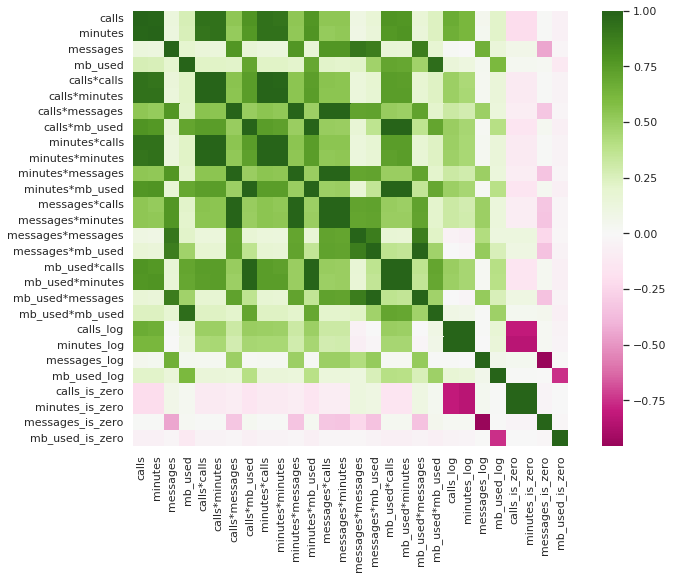

In [15]:
sns.heatmap(data=train[features].corr(),
            square=True, cmap="PiYG", 
            center=0,
            );

Очевидно, многие из них сильно коррелируют друг с другом, что логично - мы же получали их всего из 4-мерного пространства, комбинируя друг с другом.

Попробуем выполнить отбор признаков регуляризатором l1 в логистической регрессии.

In [16]:
model_lin = linear_model.LogisticRegression(random_state=random_state, penalty='l1', solver='saga', C=0.175)
coef = run_fit(model_lin, train, valid, verbose=True)
coef = coef[coef != 0]
features_effective_list = coef.index.tolist()

Доля верных ответов (обучение): 79.69%
Доля верных ответов (валидация): 79.77%
Количество ненулевых коэффициентов регрессии: 15 из 28
Коэффициенты линейной регрессии:


mb_used*mb_used      2.12
messages*messages    1.00
calls*calls          0.62
calls*minutes        0.38
minutes*calls        0.38
minutes*minutes      0.09
mb_used_is_zero      0.00
minutes              0.00
messages             0.00
minutes*messages     0.00
minutes*mb_used      0.00
messages_is_zero     0.00
messages*minutes     0.00
messages*mb_used    -0.00
mb_used*minutes      0.00
mb_used*messages    -0.00
calls_is_zero        0.00
minutes_is_zero      0.00
calls                0.00
calls_log           -0.14
mb_used_log         -0.19
minutes_log         -0.20
messages*calls      -0.21
calls*messages      -0.21
messages_log        -0.27
mb_used*calls       -0.39
calls*mb_used       -0.39
mb_used             -1.14
dtype: float64

Ну в целом ~80% - очень неплохо для линейной модели.

Попробуем еще покрутить решатели и регуляризаторы для практики.

Но для начала сделаем для этого функцию.

In [17]:
def run_param_grid(model_func, p_list, train, valid, feature_list=False):
    if feature_list == False:
        feature_list = train[features].columns
    best_score = 0
    train_score = 0
    for p in p_list:
        try:
            try:
                model = model_func(random_state=random_state, **p)
            except:
                model = model_func(**p)
            model.fit(train[features][feature_list], train[targets])
            acc = model.score(valid[features][feature_list], valid[targets])
            if acc > best_score:
                best_score = acc
                train_score = model.score(train[features][feature_list], train[targets])
                best_parameters = p
                best_model = model
        except Exception as e:
            # print(e)
            1;
    print(f'Лучшие гиперпараметры: \nдоля верных ответов (обучение): {train_score:.2%}\nдоля верных ответов (валидация): {best_score:.2%}\nпараметры: {best_parameters}')
    return(best_model)

Начинаем крутить.

In [18]:
%%time
model = linear_model.LogisticRegression
p_list = model_selection.ParameterGrid({
                                'penalty': ['none', 'l1', 'l2'],
                                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                'C': np.logspace(-3, 1, num=10),
})
best_model = run_param_grid(model, p_list, train, valid)

Лучшие гиперпараметры: 
доля верных ответов (обучение): 79.63%
доля верных ответов (валидация): 79.93%
параметры: {'C': 0.1668100537200059, 'penalty': 'l1', 'solver': 'saga'}
CPU times: user 30.3 s, sys: 27.6 s, total: 57.9 s
Wall time: 58 s


Будем считать, что мы достигли максимума с логистической регрессией в таком примитивном подходе. В конце проекта сделаем все с кросс-валидацией.

Проверим на тестовой выборке.

In [19]:
predictions = best_model.predict(test[features])
print(f'Доля верных ответов (тест): {metrics.accuracy_score(test[targets], predictions):.2%}')

Доля верных ответов (тест): 81.09%


Лучше, чем на обучении! Запомним и двинемся дальше.

### К-ближайших соседей

У нас стандартизованное пространство признаков, и я пока не совсем понимаю, насколько это хорошо. По идее некоторые признаки должны обладать большим весом. Не будем этим заниматься в рамках текущего проекта.

In [20]:
model = neighbors.KNeighborsClassifier()
print('Только исходные признаки')
run_fit(model, train, valid, features_list=base_features_list, verbose=False)
print('Исходные + сгенерированные признаки')
run_fit(model, train, valid, verbose=False);

Только исходные признаки
Доля верных ответов (обучение): 84.39%
Доля верных ответов (валидация): 76.62%
Исходные + сгенерированные признаки
Доля верных ответов (обучение): 84.39%
Доля верных ответов (валидация): 77.61%


Неплохой результат (для дефолтных настроек). Начинаем более точную настройку. Единственное, чего мы тут не особо учитываем - это вводимые метрики. У нас есть стандартизованное пространство признаков, и получается, что все признаки там имеют равный "вес". Но попробуем как есть.

In [21]:
%%time
model = neighbors.KNeighborsClassifier
p_list = model_selection.ParameterGrid({
                                'n_neighbors': np.arange(1,11,1),
                                'weights': ['uniform', 'distance'],
                                'algorithm': ['ball_tree', 'kd_tree'],
                                'metric': ['euclidean', 'manhattan', 'chebyshev'],
                                'n_jobs': [8],
})
best_model = run_param_grid(model, p_list, train, valid)

Лучшие гиперпараметры: 
доля верных ответов (обучение): 100.00%
доля верных ответов (валидация): 80.10%
параметры: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_jobs': 8, 'n_neighbors': 10, 'weights': 'distance'}
CPU times: user 20.9 s, sys: 0 ns, total: 20.9 s
Wall time: 26.2 s


Очень неплохо для такой простой модели.

In [22]:
predictions = best_model.predict(test[features])
print(f'Доля верных ответов (тест): {metrics.accuracy_score(test[targets], predictions):.2%}')

Доля верных ответов (тест): 81.84%


### Решающее дерево

Попробуем одно дерево без ансамбля.

In [23]:
model = tree.DecisionTreeClassifier(random_state=random_state)
print('Только исходные признаки')
run_fit(model, train, valid, features_list=base_features_list, verbose=False)
print('Исходные + сгенерированные признаки')
run_fit(model, train, valid, verbose=False);

Только исходные признаки
Доля верных ответов (обучение): 100.00%
Доля верных ответов (валидация): 73.30%
Исходные + сгенерированные признаки
Доля верных ответов (обучение): 100.00%
Доля верных ответов (валидация): 70.15%


Наблюдаем переобучение. Надо уменьшать глубину дерева или усиливать критерии оставнова. Вручную это делать бестолково, так что лучше сразу запустим с сеткой параметров. Но сначала посмотрим, как параметры по отдельности влияют на переобучение.

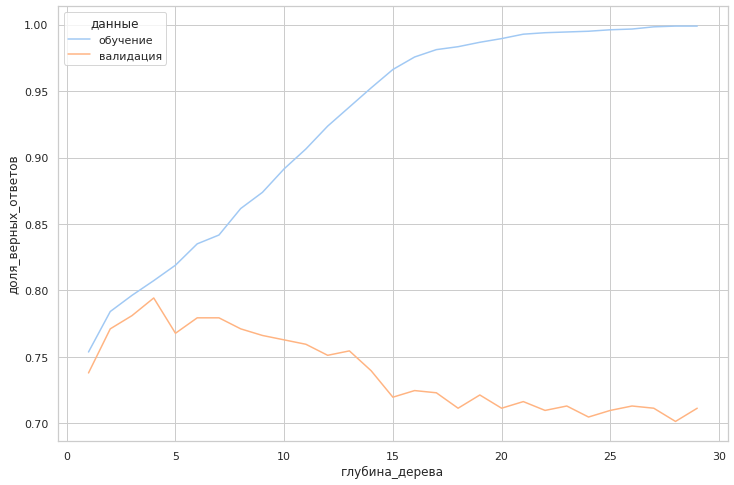

In [24]:
result = pd.DataFrame()
for i in np.arange(1,30,1):
    model = tree.DecisionTreeClassifier(random_state=random_state,
                                        max_depth=i)
    model.fit(train[features], train[targets])
    train_score = metrics.accuracy_score(train[targets], model.predict(train[features]))
    val_score = metrics.accuracy_score(valid[targets], model.predict(valid[features]))
    cols = ['глубина_дерева', 'доля_верных_ответов', 'данные']
    result = result.append(pd.DataFrame([[i, train_score, 'обучение']], columns=cols))
    result = result.append(pd.DataFrame([[i, val_score, 'валидация']], columns=cols))
result = result.reset_index(drop=True)
sns.lineplot(data=result, x='глубина_дерева', y='доля_верных_ответов', hue='данные');

Вот так и выглядит переобучение. Исходя из этого графика, оптимальная глубина лежит между 5 и 10.

Но есть и другие параметры. Вроде как главные - минимальное количество образцов в листе (min_samples_leaf) и минимальное количество образцов для формирования узла (min_samples_split).

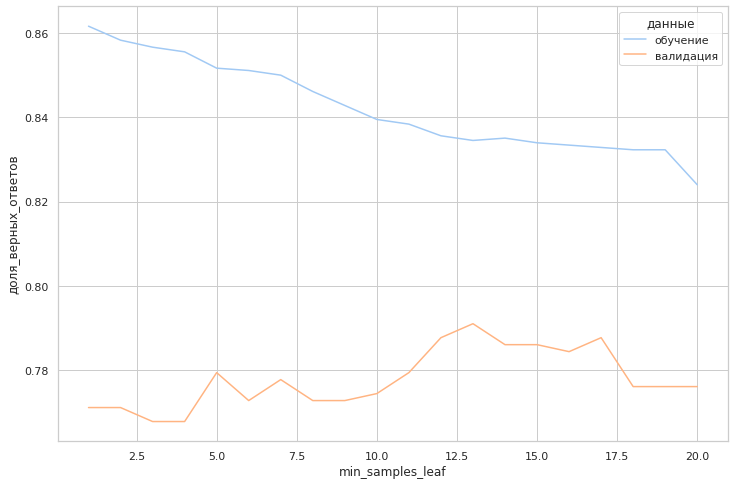

In [25]:
result = pd.DataFrame()
for i in np.arange(1,21,1):
    model = tree.DecisionTreeClassifier(random_state=random_state,
                                        max_depth=8,
                                        min_samples_leaf=i)
    model.fit(train[features], train[targets])
    train_score = metrics.accuracy_score(train[targets], model.predict(train[features]))
    val_score = metrics.accuracy_score(valid[targets], model.predict(valid[features]))
    cols = ['min_samples_leaf', 'доля_верных_ответов', 'данные']
    result = result.append(pd.DataFrame([[i, train_score, 'обучение']], columns=cols))
    result = result.append(pd.DataFrame([[i, val_score, 'валидация']], columns=cols))
result = result.reset_index(drop=True)
sns.lineplot(data=result, x='min_samples_leaf', y='доля_верных_ответов', hue='данные');

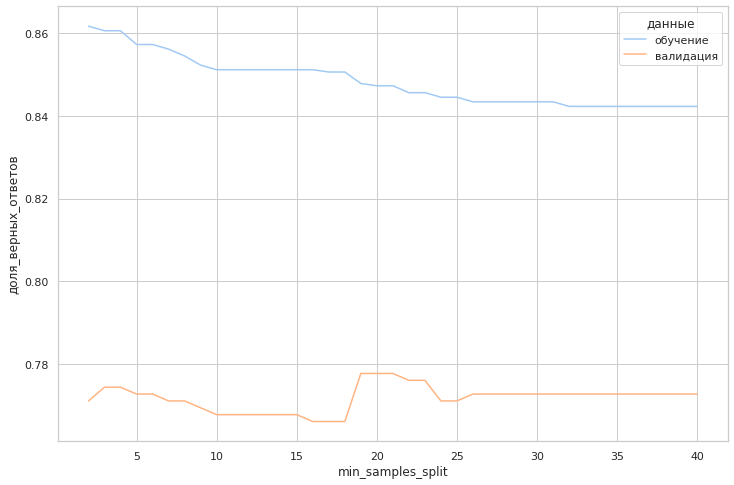

In [26]:
result = pd.DataFrame()
for i in np.arange(2,41,1):
    model = tree.DecisionTreeClassifier(random_state=random_state,
                                        max_depth=8,
                                        min_samples_split=i)
    model.fit(train[features], train[targets])
    train_score = metrics.accuracy_score(train[targets], model.predict(train[features]))
    val_score = metrics.accuracy_score(valid[targets], model.predict(valid[features]))
    cols = ['min_samples_split', 'доля_верных_ответов', 'данные']
    result = result.append(pd.DataFrame([[i, train_score, 'обучение']], columns=cols))
    result = result.append(pd.DataFrame([[i, val_score, 'валидация']], columns=cols))
result = result.reset_index(drop=True)
sns.lineplot(data=result, x='min_samples_split', y='доля_верных_ответов', hue='данные');

Не совсем понятно, насколько хорошо они помогают, но точно влияют.

А теперь автоматический поиск.

In [27]:
%%time
model = tree.DecisionTreeClassifier
p_list = model_selection.ParameterGrid({
                                    'criterion': ['gini', 'entropy'],
                                    'splitter': ['best', 'random'],
                                    'max_depth': np.arange(2,15,2),
                                    'min_samples_split': np.arange(2,8,2),
                                    'min_samples_leaf': np.arange(10,50,10),
                                    'random_state': [random_state]
                                    
})
best_model = run_param_grid(model, p_list, train, valid)

Лучшие гиперпараметры: 
доля верных ответов (обучение): 80.35%
доля верных ответов (валидация): 79.77%
параметры: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 2077, 'splitter': 'random'}
CPU times: user 8.42 s, sys: 0 ns, total: 8.42 s
Wall time: 8.44 s


Гиперпараметры оптимизированы, тестируем.

In [28]:
predictions = best_model.predict(test[features])
print(f'Доля верных ответов (тест): {metrics.accuracy_score(test[targets], predictions):.2%}')

Доля верных ответов (тест): 80.35%


Удивительно неплохо (по сравнению с обучением).

### Наивный Байес

Не ожидаем ничего великого, но посмотрим на результат.

Сразу оговоримся, что гиперпараметров тут практически нет, так что ничего крутить не будем.

In [29]:
model = naive_bayes.GaussianNB()
print('Только исходные признаки')
run_fit(model, train, valid, features_list=base_features_list, verbose=False)
print('Исходные + сгенерированные признаки')
run_fit(model, train, valid, verbose=False)
predictions = best_model.predict(test[features])
print(f'Доля верных ответов (тест): {metrics.accuracy_score(test[targets], predictions):.2%}')

Только исходные признаки
Доля верных ответов (обучение): 78.47%
Доля верных ответов (валидация): 77.45%
Исходные + сгенерированные признаки
Доля верных ответов (обучение): 77.59%
Доля верных ответов (валидация): 78.11%
Доля верных ответов (тест): 80.35%


На тесте результат лучше, чем на валидации, но в целом метод не очень подходит для нашей задачи.

### Метод опорных векторов

In [30]:
model = svm.SVC()
print('Только исходные признаки')
run_fit(model, train, valid, features_list=base_features_list, verbose=False)
print('Исходные + сгенерированные признаки')
run_fit(model, train, valid, verbose=False);

Только исходные признаки
Доля верных ответов (обучение): 80.74%
Доля верных ответов (валидация): 78.28%
Исходные + сгенерированные признаки
Доля верных ответов (обучение): 80.41%
Доля верных ответов (валидация): 78.44%


In [31]:
%%time
model = svm.SVC
p_list = model_selection.ParameterGrid({
                                    'C': np.linspace(0.01, 3, 7),
                                    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                    'gamma': ['scale', 'auto'],
                                    'shrinking': [True, False],
                                    'random_state': [random_state]
})
best_model = run_param_grid(model, p_list, train, valid)
predictions = best_model.predict(test[features])
print(f'Доля верных ответов (тест): {metrics.accuracy_score(test[targets], predictions):.2%}')

Лучшие гиперпараметры: 
доля верных ответов (обучение): 80.52%
доля верных ответов (валидация): 79.27%
параметры: {'C': 3.0, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 2077, 'shrinking': True}
Доля верных ответов (тест): 81.34%
CPU times: user 26.5 s, sys: 0 ns, total: 26.5 s
Wall time: 26.5 s


В общем вполне хорошо.

### Случайный лес

Проверим, что получится сходу.

In [32]:
model = ensemble.RandomForestClassifier(random_state=random_state)
print('Только исходные признаки')
run_fit(model, train, valid, features_list=base_features_list, verbose=False)
print('Исходные + сгенерированные признаки')
run_fit(model, train, valid, verbose=False);

Только исходные признаки
Доля верных ответов (обучение): 97.90%
Доля верных ответов (валидация): 78.61%
Исходные + сгенерированные признаки
Доля верных ответов (обучение): 97.73%
Доля верных ответов (валидация): 78.28%


Видим, что лес как бы переобучился, подогнавшись под обучающую выборку, но при этом все равно выдает неплохой результат на валидации.

Попробуем покрутить гиперпараметры.

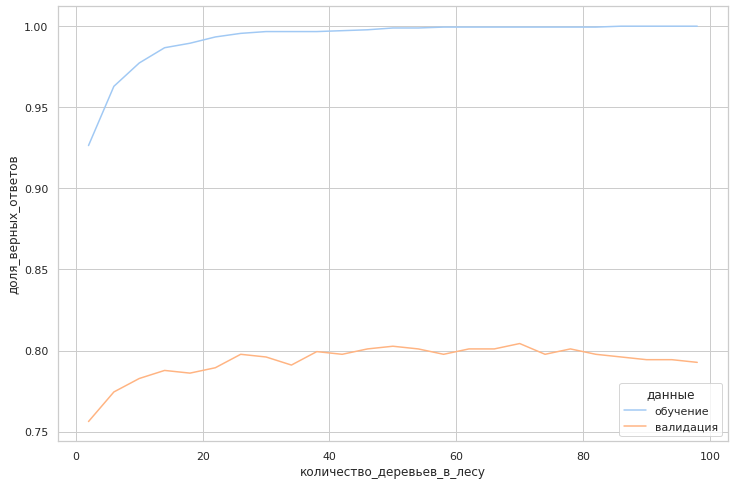

In [33]:
result = pd.DataFrame()
for i in np.arange(2,100,4):
    model = ensemble.RandomForestClassifier(random_state=random_state,
                                        n_estimators=i)
    model.fit(train[features], train[targets])
    train_score = metrics.accuracy_score(train[targets], model.predict(train[features]))
    val_score = metrics.accuracy_score(valid[targets], model.predict(valid[features]))
    cols = ['количество_деревьев_в_лесу', 'доля_верных_ответов', 'данные']
    result = result.append(pd.DataFrame([[i, train_score, 'обучение']], columns=cols))
    result = result.append(pd.DataFrame([[i, val_score, 'валидация']], columns=cols))
result = result.reset_index(drop=True)
sns.lineplot(data=result, x='количество_деревьев_в_лесу', y='доля_верных_ответов', hue='данные');

Интересно, что тут тоже наблюдается что-то вроде переобучения - максимум на валидации лежит в области 40-60 деревьев, а дальше результат ухудшается. Хотя, возможно, это связано с использованием фиксированной валидационной выборки, а не кросс-валидации.

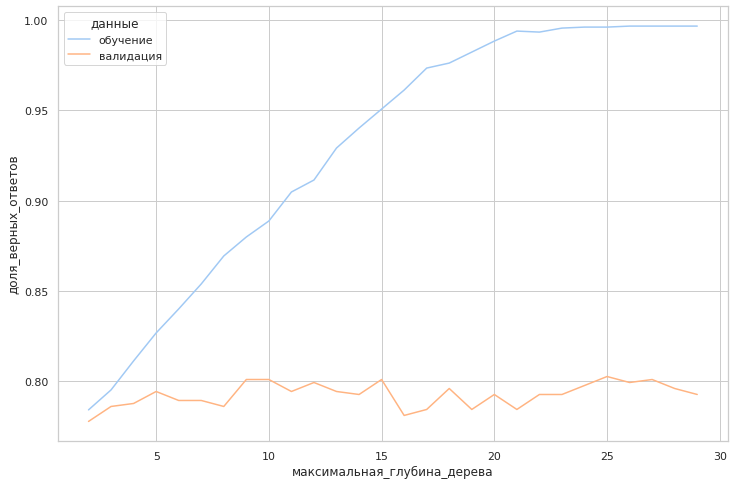

In [34]:
result = pd.DataFrame()
for i in np.arange(2,30,1):
    model = ensemble.RandomForestClassifier(random_state=random_state,
                                        n_estimators=30,
                                        max_depth=i)
    model.fit(train[features], train[targets])
    train_score = metrics.accuracy_score(train[targets], model.predict(train[features]))
    val_score = metrics.accuracy_score(valid[targets], model.predict(valid[features]))
    cols = ['максимальная_глубина_дерева', 'доля_верных_ответов', 'данные']
    result = result.append(pd.DataFrame([[i, train_score, 'обучение']], columns=cols))
    result = result.append(pd.DataFrame([[i, val_score, 'валидация']], columns=cols))
result = result.reset_index(drop=True)
sns.lineplot(data=result, x='максимальная_глубина_дерева', y='доля_верных_ответов', hue='данные');

Как видим, оптимальная глубина между 5 и 10 соответствует тому же значению для одного дерева. Зато при дальнейшем увеличении мы не видим падения качества на валидации, то есть в этом смысле переобучения нет.

Теперь покрутим ручки автоматически.

In [35]:
%%time
model = ensemble.RandomForestClassifier
p_list = model_selection.ParameterGrid({
                                    'n_estimators': np.arange(20,80,30),
                                    #'criterion': ['gini', 'entropy'],
                                    #'splitter': ['best', 'random'],
                                    'max_depth': np.arange(2,9,2),
                                    'min_samples_split': np.arange(1,10,2),
                                    'min_samples_leaf': np.arange(5,55,10),
                                    
})
best_model = run_param_grid(model, p_list, train, valid)

Лучшие гиперпараметры: 
доля верных ответов (обучение): 81.13%
доля верных ответов (валидация): 79.60%
параметры: {'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 3, 'n_estimators': 20}
CPU times: user 29.5 s, sys: 0 ns, total: 29.5 s
Wall time: 29.5 s


Выглядит здорово. Будем считать, что лучше уже не сделаем без кросс-валидации.

In [36]:
predictions = best_model.predict(test[features])
print(f'Доля верных ответов (тест): {metrics.accuracy_score(test[targets], predictions):.2%}')

Доля верных ответов (тест): 81.59%


### Градиентный бустинг

Ну и попробуем самый модный алгоритм

In [37]:
%%time
xgb.set_config(verbosity=0)
model = xgb.XGBClassifier(random_state=random_state)
print('Только исходные признаки')
run_fit(model, train, valid, features_list=base_features_list, verbose=False)
print('Исходные + сгенерированные признаки')
run_fit(model, train, valid, verbose=False);

Только исходные признаки
Доля верных ответов (обучение): 97.07%
Доля верных ответов (валидация): 76.95%
Исходные + сгенерированные признаки
Доля верных ответов (обучение): 99.72%
Доля верных ответов (валидация): 78.61%
CPU times: user 41.5 s, sys: 0 ns, total: 41.5 s
Wall time: 41.9 s


И опять видим переобучение. Надо крутить ручки. Вроде как сабсэмплинг поможет справиться с ним.

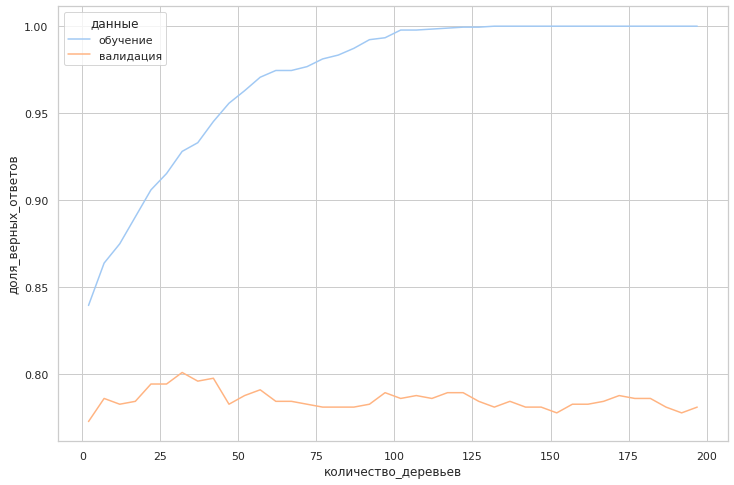

In [38]:
result = pd.DataFrame()
for i in np.arange(2,200,5):
    model = xgb.XGBClassifier(random_state=random_state,
                              n_estimators=i,)
    model.fit(train[features], train[targets])
    train_score = metrics.accuracy_score(train[targets], model.predict(train[features]))
    val_score = metrics.accuracy_score(valid[targets], model.predict(valid[features]))
    cols = ['количество_деревьев', 'доля_верных_ответов', 'данные']
    result = result.append(pd.DataFrame([[i, train_score, 'обучение']], columns=cols))
    result = result.append(pd.DataFrame([[i, val_score, 'валидация']], columns=cols))
result = result.reset_index(drop=True)
sns.lineplot(data=result, x='количество_деревьев', y='доля_верных_ответов', hue='данные');

Видим переобучение при большом количестве деревьев. Посмотрим еще на сабсэмплинг.

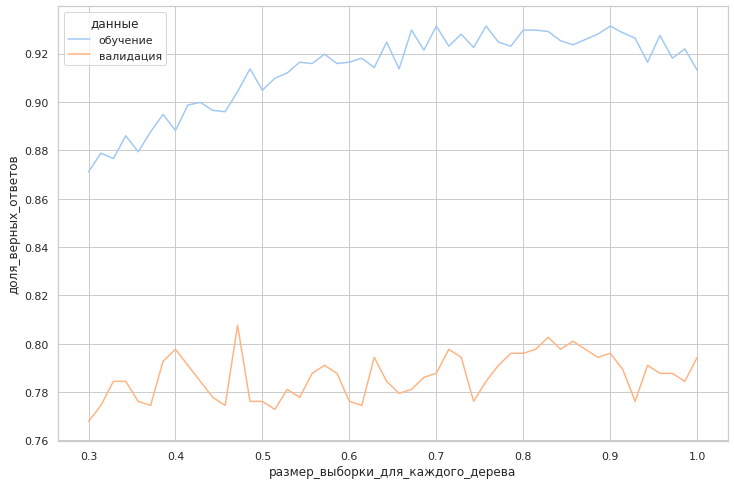

In [39]:
result = pd.DataFrame()
for i in np.linspace(0.3, 1, 50):
    model = xgb.XGBClassifier(random_state=random_state,
                              n_estimators=26,
                              subsample=i)
    model.fit(train[features], train[targets])
    train_score = metrics.accuracy_score(train[targets], model.predict(train[features]))
    val_score = metrics.accuracy_score(valid[targets], model.predict(valid[features]))
    cols = ['размер_выборки_для_каждого_дерева', 'доля_верных_ответов', 'данные']
    result = result.append(pd.DataFrame([[i, train_score, 'обучение']], columns=cols))
    result = result.append(pd.DataFrame([[i, val_score, 'валидация']], columns=cols))
result = result.reset_index(drop=True)
sns.lineplot(data=result, x='размер_выборки_для_каждого_дерева', y='доля_верных_ответов', hue='данные');

На такой картинке ничего не понятно - все скачет. Я это списываю на использование единственной валидационной выборки.

У градиентного бустинга слишком много параметров и вручную точно не получится найти оптимум в их многомерном пространстве. Опять запускаем сетку. Сетка искусственно обрезана, чтобы повысить скорость. Потом будет полноценный расчет.

In [40]:
%%time
model = xgb.XGBClassifier
p_list = model_selection.ParameterGrid({
                                'objective':['binary:logistic'],
                                'learning_rate': np.linspace(0.03, 0.05, 3),
                                'max_depth': np.arange(1,9,3),
                                'min_child_weight': np.arange(1,8,3),
                                'subsample': np.linspace(0.7, 0.8, 2),
                                'n_estimators': np.arange(40,100,30),
                                'nthread': [4]
})
best_model = run_param_grid(model, p_list, train, valid)

Лучшие гиперпараметры: 
доля верных ответов (обучение): 88.66%
доля верных ответов (валидация): 80.60%
параметры: {'learning_rate': 0.04, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 70, 'nthread': 4, 'objective': 'binary:logistic', 'subsample': 0.8}
CPU times: user 1min 57s, sys: 1.57 s, total: 1min 59s
Wall time: 2min


Отличный результат на валидации. Но опять же - это выглядит как подгонка под конкретно нашу валидационную выборку.

Посмотрим еще на важность признаков.

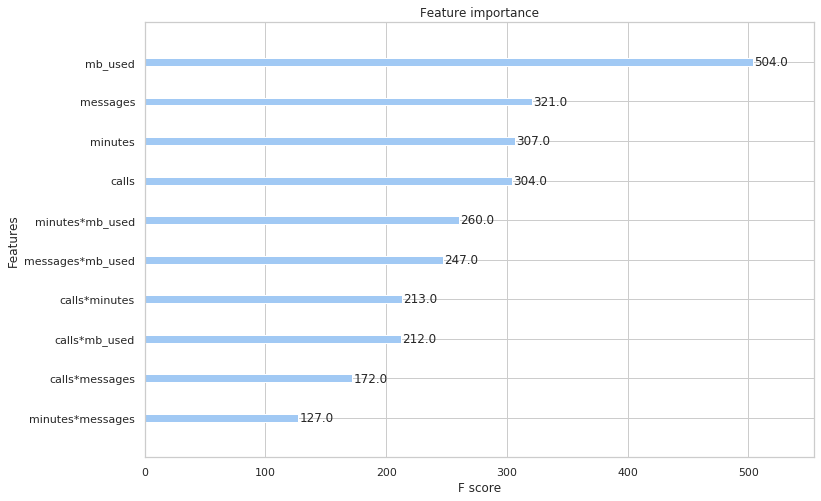

In [41]:
xgb.plot_importance(best_model);

In [42]:
predictions = best_model.predict(test[features])
print(f'Доля верных ответов (тест): {metrics.accuracy_score(test[targets], predictions):.2%}')

Доля верных ответов (тест): 82.34%


Тоже хорошо.

### Выводы

Сравнили 8 моделей (указана точность на тестовой выборке):
- бэйзлайн "всегда 0", точность около 70%
- логистическая регрессия, точность более 81%
- K ближайших соседей, точность более 81%
- дерево решений, точность более 80%
- наивный Байес, точность более 80%
- метод опорных векторов, точность более 81%
- случайный лес, точность более 81%
- градиентный бустинг на основе деревьев, точность более 82%

Для каждой модели кроме бэйзлайна и Байеса использовали поиск оптимальных параметров по сетке.

Промежуточный вывод: все модели, кроме наивного Байеса, выдают очень близкий результат.

Дополнительное соображение: в ходе отработки проекта я тестил все это с разными значениями random_state и получал разные результаты, при этом лидерами всегда были или бустинг, или лес, а Байес всегда был в хвосте. Результаты остальных алгоритмов очень сильно зависят от случайности. Я это списываю на то, какой именно получается тестовая выборка.

## Кросс-валидация

Использование заранее фиксированной валидационной выборки не очень осмысленно, когда есть автоматизированная кросс-валидация. Так давайте же погрузимся в нее.

Сначала создадим функцию, которая будет сама запускать кросс-валидацию и выдавать результат, а также осуществлять поиск оптимальных гиперпараметров: по сетке или случайно.

Кроме того, в функцию можно передать аргумент search=False, и тогда она не будет делать поиск гиперапараметров, а будет использовать те, которые дали. Это сделано для того, чтобы после первичного расчета (занимает час на гугл колабе) можно было использовать уже подобранные гиперпараметры.

In [43]:
def run_cross_val(train, test, model, parameters, features_list=False, n_splits=10, test_size=0.2, n_iter=5, rand=True, search=True):
    start = time.time()
    n_jobs = 8
    # в функцию можно передать ограниченный список признаков, которые будут использованы
    # Если список не передан, то просто используем все имеющиеся
    if features_list == False:
        features_list = train[features].columns.tolist()
    train_features = train[features][features_list]
    cv = model_selection.StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    
    # если нужен поиск, то задаем один из двух вариантов
    if search:
        if rand:
            param_cv = model_selection.RandomizedSearchCV(model, parameters, scoring='accuracy', cv=cv, n_jobs=n_jobs, 
                                                        error_score=0.0, refit=True,
                                                        n_iter=n_iter, random_state=random_state
                                                        )
        else:
            param_cv = model_selection.GridSearchCV(model, parameters, scoring='accuracy', cv=cv, n_jobs=n_jobs, 
                                                    error_score=0.0, refit=True,
                                                    )
    
    # если поиск не нужен, просто берем переданные параметры из словаря    
    else:
        param_cv = model.set_params(**parameters)
    
    param_cv.fit(train_features, train[targets])
    
    # в случае поиска и его отсутствия результаты получаются из разных источников
    if search:
        cv_score = param_cv.best_score_
        estimator = param_cv.best_estimator_
        param = param_cv.best_params_
    else:
        cv_score = model_selection.cross_val_score(param_cv, train_full[features], train_full[targets], cv=cv, n_jobs=-1).mean()
        estimator = param_cv
        param = estimator.get_params()
    
    test_score = param_cv.score(test[features][features_list], test[targets])
    model_name = str(type(model)).split('.')[-1].split('\'')[0]
    end = time.time()
    t = end - start
    print(f'Точность (кросс-вал / тест): {cv_score:.2%} / {test_score:.2%}, модель {model_name}, время расчета {t:.0f} сек')
    # возвращаем не только аккьюраси, но и гиперпараметры, а также сами модели
    return([
        model_name,
        cv_score,
        test_score,
        train_features.columns.tolist(),
        param,
        estimator
    ])

А теперь запустим оптимизацию всех использованных выше типов моделей. Каждая из них после такой оптимизации приблизится к пределу своих возможностей, поэтому тут же будем запускать их на тестовой выборке.

Пояснение:
- сначала создаем "пустые" модели, в которых задан только рандом стейт. Т.к. лес и бустинг дают лучшие результаты, создаем их в нескольких экземплярах
- создаем набор словарей варьируемых параметров (для долгого расчета)
- создаем список лучших параметров (получен мною по результату одного долгого расчета)
- запускаем для всех моделей написанную выше функцию, при этом на выбор вставляем или варьируемые параметры, или лучшие
- результат собираем в один датафрейм

In [44]:
%%time

n_splits=10 
n_iter=150

model_lin = linear_model.LogisticRegression(random_state=random_state)
model_tree = tree.DecisionTreeClassifier(random_state=random_state)
model_knn = neighbors.KNeighborsClassifier()
model_nb = naive_bayes.GaussianNB()
model_svm = svm.SVC(random_state=random_state)
model_rf1 = ensemble.RandomForestClassifier(random_state=random_state)
model_rf2 = ensemble.RandomForestClassifier(random_state=random_state+1)
model_rf3 = ensemble.RandomForestClassifier(random_state=random_state+2)
model_xgb1 = xgb.XGBClassifier(random_state=random_state)
model_xgb2 = xgb.XGBClassifier(random_state=random_state+1)
model_xgb3 = xgb.XGBClassifier(random_state=random_state+2)

parameters_lin = {
    'penalty': ['none', 'l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': np.logspace(-3, 2, num=30),
                  }
parameters_tree = {
    'max_depth': np.arange(2,20,2),
    'min_samples_split': np.arange(1,40,4),
    'min_samples_leaf': np.arange(5,40,10),
                   }
parameters_knn = {
    'n_neighbors': np.arange(1,13,1),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'n_jobs': [4],
                   }
parameters_nb = {
    'var_smoothing': np.linspace(1e-10, 1e-8, 9),
    }
parameters_svm = {
    'C': np.linspace(0.01, 3, 11),
    'coef0': np.linspace(-2, 2, 11),
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False]
                 }
parameters_rf = {
    'n_estimators': np.arange(10,100,5),
    'max_depth': np.arange(3,12,2),
    'min_samples_split': np.arange(1,40,4),
    'min_samples_leaf': np.arange(5,40,10),
                 }
parameters_xgb = {
    'objective':['binary:logistic'],
    'learning_rate': np.linspace(0.005, 0.08, 20),
    'max_depth': np.arange(1,9,1),
    'min_child_weight': np.arange(1,7,1),
    'subsample': np.linspace(0.5, 1, 7),
    'n_estimators': np.arange(20,200,10),
    'nthread': [4]
              }

best_parameters = [{'solver': 'liblinear', 'penalty': 'l2', 'C': 6.2101694189156165},
                    {'min_samples_split': 25, 'min_samples_leaf': 35, 'max_depth': 6},
                    {'weights': 'distance',
                    'n_neighbors': 11,
                    'n_jobs': 4,
                    'metric': 'chebyshev',
                    'algorithm': 'kd_tree'},
                    {'var_smoothing': 6.287500000000001e-09},
                    {'shrinking': False, 'gamma': 'scale', 'coef0': 0.0, 'C': 2.701},
                    {'n_estimators': 50,
                    'min_samples_split': 29,
                    'min_samples_leaf': 5,
                    'max_depth': 11},
                    {'n_estimators': 65,
                    'min_samples_split': 29,
                    'min_samples_leaf': 5,
                    'max_depth': 11},
                    {'n_estimators': 50,
                    'min_samples_split': 29,
                    'min_samples_leaf': 5,
                    'max_depth': 11},
                    {'subsample': 0.9166666666666666,
                    'objective': 'binary:logistic',
                    'nthread': 4,
                    'n_estimators': 50,
                    'min_child_weight': 6,
                    'max_depth': 8,
                    'learning_rate': 0.060263157894736845},
                    {'subsample': 0.5,
                    'objective': 'binary:logistic',
                    'nthread': 4,
                    'n_estimators': 130,
                    'min_child_weight': 4,
                    'max_depth': 8,
                    'learning_rate': 0.020789473684210528},
                    {'subsample': 0.9166666666666666,
                    'objective': 'binary:logistic',
                    'nthread': 4,
                    'n_estimators': 100,
                    'min_child_weight': 2,
                    'max_depth': 7,
                    'learning_rate': 0.020789473684210528}]

models_list = [model_lin, model_tree, model_knn, model_nb, model_svm, 
               model_rf1, model_rf2, model_rf3, 
               model_xgb1, model_xgb2, model_xgb3]
parameters_list = [parameters_lin, parameters_tree, parameters_knn, parameters_nb, parameters_svm, 
                   parameters_rf, parameters_rf, parameters_rf, 
                   parameters_xgb, parameters_xgb, parameters_xgb]

result_table = []

# А вот тут закомментированы сроки долгого расчета и оставлен только быстрый с использованием уже найденных параметров
# for model, parameters in zip(models_list, parameters_list):
for model, parameters in zip(models_list, best_parameters):
    # tmp = run_cross_val(train_full, test, model, parameters, n_splits=n_splits, test_size=0.2, n_iter=n_iter)
    tmp = run_cross_val(train_full, test, model, parameters, n_splits=n_splits, test_size=0.2, n_iter=n_iter, search=False)
    result_table.append(tmp)
    
result = pd.DataFrame(result_table, columns=['model_name', 'accuracy (cv)', 'accuracy (test)', 'used columns', 'best parameters', 'model']).sort_values('accuracy (test)', ascending=False)
result['model_name'] = result['model_name'] + '_' + result.index.astype(str)

Точность (кросс-вал / тест): 80.31% / 80.97%, модель LogisticRegression, время расчета 2 сек
Точность (кросс-вал / тест): 79.25% / 81.84%, модель DecisionTreeClassifier, время расчета 1 сек
Точность (кросс-вал / тест): 79.81% / 82.84%, модель KNeighborsClassifier, время расчета 4 сек
Точность (кросс-вал / тест): 77.55% / 79.23%, модель GaussianNB, время расчета 0 сек
Точность (кросс-вал / тест): 79.54% / 81.72%, модель SVC, время расчета 2 сек
Точность (кросс-вал / тест): 80.48% / 82.96%, модель RandomForestClassifier, время расчета 4 сек
Точность (кросс-вал / тест): 80.31% / 83.33%, модель RandomForestClassifier, время расчета 5 сек
Точность (кросс-вал / тест): 80.35% / 83.33%, модель RandomForestClassifier, время расчета 4 сек
Точность (кросс-вал / тест): 80.68% / 82.34%, модель XGBClassifier, время расчета 16 сек
Точность (кросс-вал / тест): 80.50% / 83.08%, модель XGBClassifier, время расчета 36 сек
Точность (кросс-вал / тест): 80.54% / 82.09%, модель XGBClassifier, время расчета 3

Получили ряд классификаторов, каждый из которых на кросс-валидации выдает точность 79-80% (и только наивный Байес выпадает до 77%), а на тестовой выборке - более 80% (и опять наивный Байес выпадает).

Лучшие результаты у градиентного бустинга и случайного леса, также неплохой результат у ближайших соседей.

В принципе на этом можно было бы и закончить, но давайте попробуем последнюю меру.

## Стекинг

У нас есть множество моделей, точность которых на отложенной выборке очень близка. Попробуем стекнуть их. Параметры моделей мы уже определили ранее и не будем их изменять, то есть в стекинге используем лучшие полученные выше параметры.

Будем использовать классификатор с взвешенным голосованием, причем голосовать будем методом soft, а веса будут определены нелинейно на основе точностей моделей на тестовой выборке. Вес каждой модели равен разности между его точностью и точностью худшей модели, возведенной в 3 степень. Таким образом, худшая модель получает нулевой вес. Этот принцип я подобрал тут сам, просто потому, что он выдает лучший результат на тесте.

Метод опорных векторов в использованном варианте не поддерживает вариант soft голосования, поэтому не будет рассматриваться.

In [45]:
%%time
result = result.sort_values('accuracy (test)', ascending=False)
result['estimators'] = list(zip(result['model_name'], result['model']))
m1 = result['accuracy (test)'].max()
m2 = result['accuracy (test)'].min()

res1 = result[~result['model_name'].str.contains('SVC')]
estimators = res1['estimators'].tolist()
weights = (res1['accuracy (test)'] - m2)**3

model_stack = ensemble.VotingClassifier(estimators=estimators, voting='soft', weights=weights)
cv = model_selection.StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=random_state)
cv_accuracy = model_selection.cross_val_score(model_stack, train_full[features], train_full[targets], cv=cv, n_jobs=-1).mean()
model_stack.fit(train_full[features], train_full[targets])
test_accuracy = model_stack.score(test[features], test[targets])
print(f'Точность на тестовой выборке {test_accuracy:.2%}')

Точность на тестовой выборке 83.58%
CPU times: user 1min 41s, sys: 1.43 s, total: 1min 42s
Wall time: 1min 43s


Отлично, вытянули еще долю процента =)

Построим график с точностями всех полученных моделей.

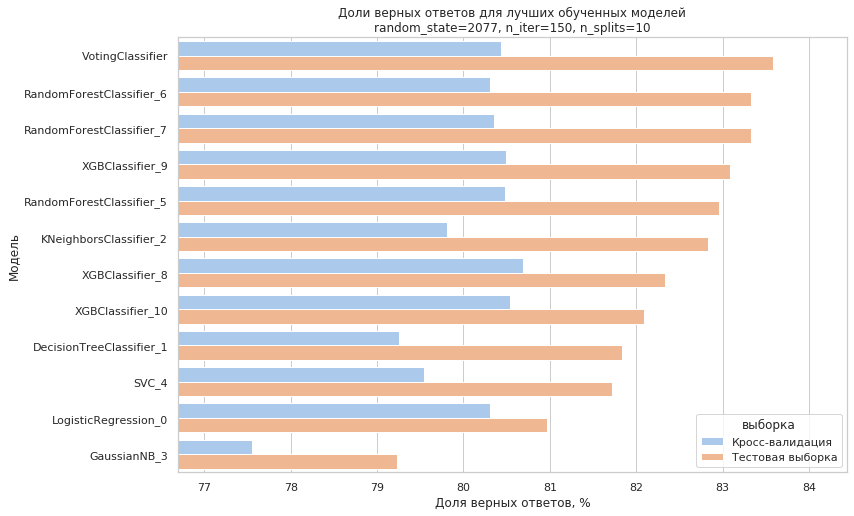

In [46]:
result_for_plot = result[['model_name', 'accuracy (cv)', 'accuracy (test)']].append(
    pd.DataFrame([['VotingClassifier', cv_accuracy, test_accuracy]], columns=['model_name', 'accuracy (cv)', 'accuracy (test)'])
).sort_values('accuracy (test)', ascending=False).reset_index(drop=True)

result_for_plot1 = result_for_plot[['model_name', 'accuracy (cv)']]
result_for_plot1['выборка'] = 'Кросс-валидация'
result_for_plot1['accuracy'] = result_for_plot1['accuracy (cv)']
result_for_plot2 = result_for_plot[['model_name', 'accuracy (test)']]
result_for_plot2['выборка'] = 'Тестовая выборка'
result_for_plot2['accuracy'] = result_for_plot2['accuracy (test)']
result_for_plot = result_for_plot1[['model_name', 'выборка', 'accuracy']].append(
    result_for_plot2[['model_name', 'выборка', 'accuracy']])
result_for_plot['accuracy'] = (result_for_plot['accuracy'] * 100)
m1 = result_for_plot['accuracy'].min()
m2 = result_for_plot['accuracy'].max()
ax = sns.barplot(data=result_for_plot, y='model_name', x='accuracy', hue='выборка')
ax.set(
    ylabel='Модель', xlabel='Доля верных ответов, %', 
    title=f'Доли верных ответов для лучших обученных моделей\nrandom_state={random_state}, n_iter={n_iter}, n_splits={n_splits}',
    xlim=(m1 - (m2-m1)/7, m2 + (m2-m1)/7)
)
fig = ax.get_figure()
fig.savefig(f'state{random_state}_iter{n_iter}_split{n_splits}_voting.png', facecolor='w', bbox_inches="tight")

## Общие выводы

- имеющуюся выборку из 3200 объектов разбили на три подвыборки: учебную (1800), валидационную (600), отложенную тестовую (800). Выборки стратифицированы
- на основе имеющихся 4 признаков создали новые: все попарные произведения, логарифмы и качественные признаки, свидетельствующие, что исходный признак равен 0
- признаки стандартизовали
- проверили точность бэйзлайн модели (выдает всегда 0), она равна 70%
- по очереди проверили модели:
    - логистическая регрессия, точность более 81%
    - K ближайших соседей, точность более 81%
    - дерево решений, точность более 80%
    - наивный Байес, точность более 80%
    - метод опорных векторов, точность более 81%
    - случайный лес, точность более 81%
    - градиентный бустинг на основе деревьев, точность более 82%
- каждая из моделей выдавала более высокую точность при обучении на полном наборе сгенерированных признаков, чем на наборе исходных признаков
- на основе кросс-валидации все модели были обучены на полной учебной выборке (учебная+валидация) со случайным поиском гиперпараметров. Случайный лес и градиентный бустинг обучены в 3 экземплярах каждый, отличающихся величиной random_state
- точности моделей на тестовой выборке при обучении с кросс-валидацией выше, чем при использовании отложенной валидационной выборки, но разница мала - порядка 1% и меньше
- все обученные модели (кроме метода опорных векторов) были объединены в стекинг методом взвешенного голосования, где вес модели тем выше, чем выше точность этой модели на тестовой выборке
- стекинг показал лучший результат по точности - более 83,5%

- вероятно, дальнейшее повышение точности невозможно, так как объекты перемешаны в пространстве признаков, и просто не могут быть разделены. Это можно объяснить тем, что данные соответствуют клиентам мобильного оператора на разных тарифах, и очень легко представить ситуацию, в которой два клиента с одинаковыми признаками используют разные тарифы

- *дополнительное соображение* в ходе написания и отработки кода были использованы разные значения random_state, и при этом результаты значительно изменялись, в частности, сильно изменялась точность всех моделей на тестовой выборке, колеблясь от 79 до 83%, при этом лучшими моделями всегда оставались случайный лес и градиентный бустинг. Из этого я делаю вывод, что выбор конкретной тестовой выборки влияет на результаты обучения очень сильно, и этим нельзя пренебрегать